In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset.h5_image_dataset import H5ImageDataset
import h5py

In [1]:
exists_path = []
total_min_navie_rmse, total_min_reversed_rmse, total_once_rmse, total_avg_rmse, total_rmse = 0, 0, 0, 0, 0 
count = 0

with open('/workspace/Marigold/results/Gopro_event_train_results.txt', 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]


    for line in lines:
        splits = line.split(' ')
        img_name, min_navie_rmse, min_reversed_rmse, once_rmse, avg_rmse = splits

        total_min_navie_rmse += float(min_navie_rmse)
        total_min_reversed_rmse += float(min_reversed_rmse)
        total_once_rmse += float(once_rmse)
        total_avg_rmse += float(avg_rmse)
        total_rmse += min(float(min_navie_rmse), float(min_reversed_rmse))

        if min_navie_rmse > min_reversed_rmse:
            count +=1

print('total_rmse:', total_rmse/len(lines))
print('total_min_navie_rmse:', total_min_navie_rmse/len(lines))
print('total_min_reversed_rmse:', total_min_reversed_rmse/len(lines))
print('total_once_rmse:', total_once_rmse/len(lines))
print('total_avg_rmse:', total_avg_rmse/len(lines))
print(count)


        


total_rmse: 0.021947061680427475
total_min_navie_rmse: 0.021948518698397364
total_min_reversed_rmse: 0.02805925206410874
total_once_rmse: 0.02248130160271991
total_avg_rmse: 0.022480330257406613
3


In [1]:
# import h5py
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# root_path = '/workspace/data/GOPRO/test'
# h5_folder = os.listdir(root_path)
# h5_folder.sort()

# total_rmse = 0
# count = 0
# reversed_count = 0

# for h5 in h5_folder[4:5]:
#     h5_path = os.path.join(root_path, h5)
#     h5_name = h5[:-3]   # GOPR0384_11_00
#     with h5py.File(h5_path, 'r') as f:

#         events = f['gen_event']
#         voxels = f['voxels']
#         blur_images = f['images']

#         for event in events:

#             # print(h5_name, event)
#             gen_event = events[f'{event}'][:]  # 이미지 데이터 불러오기
#             gen_event = gen_event.transpose(1,2,0)
#             # normalize gen_event to [-1,1]
#             max_val = np.max(np.abs(gen_event))
#             gen_event = gen_event / max_val 

#             voxel_key = event.replace('image', 'voxel')
#             gt_event = voxels[f'{voxel_key}'][:]
#             gt_event = gt_event.transpose(1,2,0)
#             # normalize gt_event to [-1,1]
#             max_val = np.max(np.abs(gt_event))
#             gt_event = gt_event / max_val

#             # [-1,1] -> [0,1]
#             gen_event = (gen_event + 1) / 2
#             gt_event = (gt_event + 1) / 2

#             diff = gen_event - gt_event
#             diff_power = diff ** 2
#             rmse = np.sqrt(np.mean(diff_power))
#             # if rmse < 0.1:
#             #     continue

#             # print name
#             print(h5_name, event)
#             print(rmse)
#             blur_image = blur_images[f'{event}'][:]
#             blur_image = blur_image.transpose(1,2,0)
#             blur_image = blur_image[:,:,::-1]
#             blur_image = Image.fromarray(blur_image)
#             blur_image.save(f'{h5_name}_{event}.png')
#             # Plot generated events
#             plt.figure(figsize=(10, 5))
#             for i in range(6):
#                 plt.subplot(2, 3, i+1)
#                 plt.imshow(gen_event[:,:,i], cmap='gray')
#                 plt.axis('off')
#                 plt.title(f'Gen Channel {i}')
#             plt.tight_layout()
#             plt.show()

#             # Plot ground truth events  
#             plt.figure(figsize=(10, 5))
#             for i in range(6):
#                 plt.subplot(2, 3, i+1)
#                 plt.imshow(gt_event[:,:,i], cmap='gray')
#                 plt.axis('off')
#                 plt.title(f'GT Channel {i}')
#             plt.tight_layout()
#             plt.show()

#         break
#     break   




# Metric

In [8]:
import h5py
import numpy as np
import os
from PIL import Image

root_path = '/workspace/data/GOPRO/train'
h5_folder = os.listdir(root_path)
h5_folder.sort()

total_rmse = 0
count = 0
reversed_count = 0

for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # GOPR0384_11_00
    with h5py.File(h5_path, 'r') as f:

        events = f['gen_event']
        voxels = f['voxels']

        for event in events:
            # print(h5_name, event)
            gen_event = events[f'{event}'][:]  # 이미지 데이터 불러오기
            gen_event = gen_event.transpose(1,2,0)
            # normalize gen_event to [-1,1]
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val 


            voxel_key = event.replace('image', 'voxel')
            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1,2,0)
            # normalize gt_event to [-1,1]
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val

            # [-1,1] -> [0,1]
            gen_event = (gen_event + 1) / 2
            gt_event = (gt_event + 1) / 2   

            for i in range(6):
                reversed_gen_event = gen_event[:,:,::-1]

            # calculate rmse
            diff = gen_event - gt_event
            diff_power = diff ** 2
            rmse = np.sqrt(np.mean(diff_power))

            diff_reversed = reversed_gen_event - gt_event
            diff_power_reversed = diff_reversed ** 2
            rmse_reversed = np.sqrt(np.mean(diff_power_reversed))

            if rmse_reversed < rmse:
                reversed_count += 1

            total_rmse += min(rmse, rmse_reversed)
            count += 1
        

print(total_rmse/count)
print(reversed_count)


0.027707963740437744
14


In [9]:
import h5py
import numpy as np
import os
from PIL import Image

root_path = '/workspace/data/GOPRO/test'
h5_folder = os.listdir(root_path)
h5_folder.sort()

total_rmse = 0
count = 0
reversed_count = 0

for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # GOPR0384_11_00
    with h5py.File(h5_path, 'r') as f:

        events = f['gen_event']
        voxels = f['voxels']

        for event in events:
            # print(h5_name, event)
            gen_event = events[f'{event}'][:]  # 이미지 데이터 불러오기
            gen_event = gen_event.transpose(1,2,0)
            # normalize gen_event to [-1,1]
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val 


            voxel_key = event.replace('image', 'voxel')
            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1,2,0)
            # normalize gt_event to [-1,1]
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val

            # [-1,1] -> [0,1]
            gen_event = (gen_event + 1) / 2
            gt_event = (gt_event + 1) / 2   

            for i in range(6):
                reversed_gen_event = gen_event[:,:,::-1]

            # calculate rmse
            diff = gen_event - gt_event
            diff_power = diff ** 2
            rmse = np.sqrt(np.mean(diff_power))

            diff_reversed = reversed_gen_event - gt_event
            diff_power_reversed = diff_reversed ** 2
            rmse_reversed = np.sqrt(np.mean(diff_power_reversed))

            if rmse_reversed < rmse:
                reversed_count += 1

            total_rmse += min(rmse, rmse_reversed)
            count += 1
        

print(total_rmse/count)
print(reversed_count)


0.028224303293887688
178


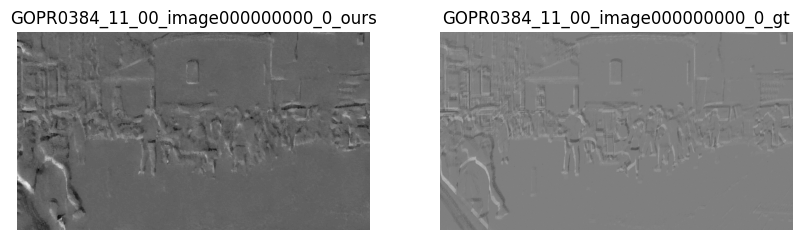

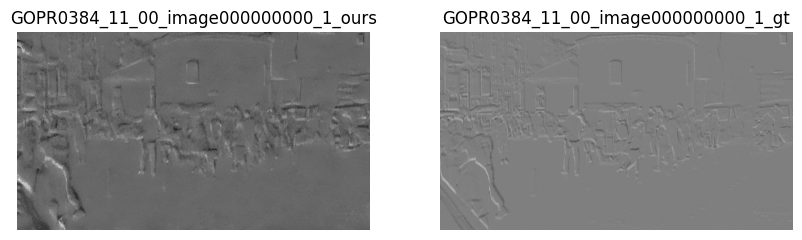

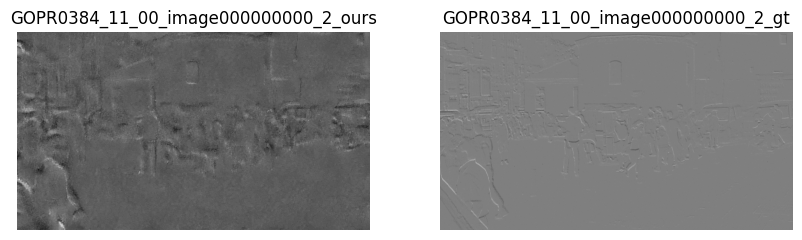

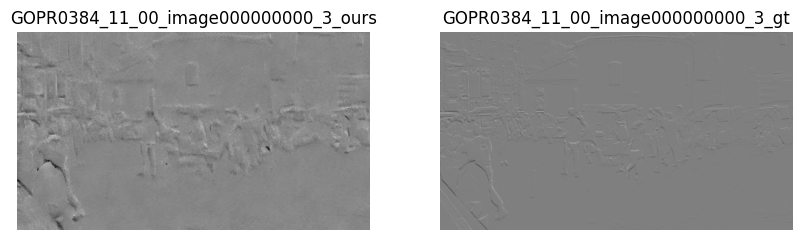

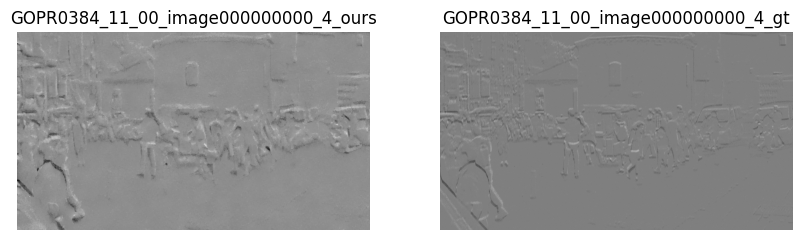

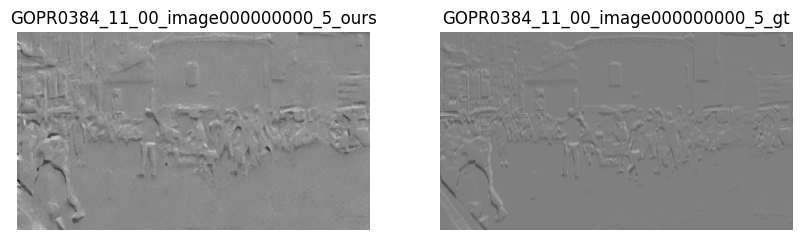

In [3]:
import h5py
import numpy as np
import os
from PIL import Image

root_path = '/workspace/data/GOPRO/test'
h5_folder = os.listdir(root_path)
h5_folder.sort()


for h5 in h5_folder:
    h5_path = os.path.join(root_path, h5)
    h5_name = h5[:-3]   # GOPR0384_11_00
    with h5py.File(h5_path, 'r') as f:

        events = f['gen_event']
        voxels = f['voxels']

        for event in events:
            # print(h5_name, event)
            gen_event = events[f'{event}'][:]  # 이미지 데이터 불러오기
            voxel_key = event.replace('image', 'voxel')
            gen_event = gen_event.transpose(1,2,0)

            # normllize gen_event to [-1,1]
            max_val = np.max(np.abs(gen_event))
            gen_event = gen_event / max_val 

            gt_event = voxels[f'{voxel_key}'][:]
            gt_event = gt_event.transpose(1,2,0)
            # normalize gt_event to [-1,1]
            max_val = np.max(np.abs(gt_event))
            gt_event = gt_event / max_val

            # calculate rmse
            diff = gen_event - gt_event
            diff_power = diff ** 2
            rmse = np.sqrt(np.mean(diff_power))


            # plot in grayscale 6 imgs
            for i in range(6):
                out = gen_event[:,:,i]
                out_gt = gt_event[:,:,i]
                out = (out + 1) / 2 
                out_gt = (out_gt + 1) / 2

                out = out * 255
                out_gt = out_gt * 255
                out = out.astype('uint8')
                out_gt = out_gt.astype('uint8')

                out = Image.fromarray(out).convert('L')
                out_gt = Image.fromarray(out_gt).convert('L')

                # plot in 1x2
                fig, axs = plt.subplots(1, 2, figsize=(10, 5))
                axs[0].imshow(out, cmap='gray')  
                axs[0].set_title(f'{h5_name}_{event}_{i}_ours')
                axs[0].axis('off')

                axs[1].imshow(out_gt, cmap='gray')
                axs[1].set_title(f'{h5_name}_{event}_{i}_gt')
                axs[1].axis('off')
                plt.show()
            break

        break
    break           

